<a href="https://colab.research.google.com/github/smithajo/ML-InternshipStudio/blob/master/IntershipStudioProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE : Marketing Campaign for Banking Products**

**Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans.**

The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign. 

## **Attribute Information :**

* ID: Customer ID 
* Age: Customer's age in completed years 
* Experience: #years of professional experience 
* Income: Annual income of the customer (\$000) 
* ZIP Code: Home Address ZIP code. 
* Family: Family size of the customer 
* CCAvg: Avg. spending on credit cards per month (\$000) 
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
* Mortgage: Value of house mortgage if any. ($000) 
* Personal Loan: Did this customer accept the personal loan offered in the last campaign? 
* Securities Account: Does the customer have a securities account with the bank? 
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Does the customer use internet banking facilities? 
* Credit card: Does the customer use a credit card issued by the bank? 

## **Step1. Import the datasets and libraries**

In [161]:
#Import required Libraries
import numpy as np              #for numerical tools
import pandas as pd             #for data analysis
import seaborn as sns           #for making statistical graphs
import matplotlib.pyplot as plt #for plotting graphs
from sklearn import metrics     #to perform classifier funtions
%matplotlib inline

In [162]:
#Importing dataset Bank_Personal_Loan_Modelling.xlsx
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",'Data')  #Reading data from excel file
df                                                              #printing the dataset of 5000 rows × 14 columns

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [163]:
df.head()       #printing the first 5 values from the file 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [164]:
df.tail(5)      #printing the last 5 values from the file 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [165]:
df.info()     #displays the data types and non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Check datatype**

In [166]:
df.dtypes      #printing the data types of values in each column

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Statistical summary**

In [167]:
df.describe()     #To show basic stats of each column

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Shape**

In [168]:
df.shape    #To display the number of rows and columns

(5000, 14)

**Null values**

In [169]:
df.isna()     #Displays whether null values are present or not in boolean

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## **Step 2. Check if you need to clean the data for any of the variables**

In [170]:
df.isnull().sum()     #displays how many null values are present in each column

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [171]:
#Finding if the columns experience and age are related and by how much
experience = df['Experience']
age = df['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

Columns experience and age are correlated to each other by 0.9942 which is very high and means that the removal of any one of the columns would not result in any loss of data.
Also the column ID is simply a noisy data since it is not relevent in finding us the solution, thus we can drop the column 'ID'.

In [172]:
df = df.drop(['ID','Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


After execution of above code we can see that columns ID and Experience have been removed

## **Step 3. EDA**

**Number of unique values in each column**

In [173]:
df.nunique()    #return number of unique elements

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Since ZIP code is a nominal data that contains distinct values we can drop column ZIP Code

In [174]:
df = df.drop(['ZIP Code'],axis=1)     #dropping column ZIP Code
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**Number of people with zero mortgage**

In [175]:
(df.Mortgage == 0).sum()    #displays number of people with 0 Mortgage

3462

**Number of people with zero credit card spending per month**

In [176]:
(df.CCAvg == 0).sum()     #displays number of people with Average spending on credit cards per month to be 0

106

**Value counts of all categorical columns**

In [177]:
df.Age.value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [178]:
df.Income.value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [179]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [180]:
df.CCAvg.value_counts()

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
8.200000      1
5.333333      1
4.666667      1
8.900000      1
9.300000      1
Name: CCAvg, Length: 108, dtype: int64

In [181]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [182]:
df.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [183]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [184]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [185]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [186]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [187]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

### **Univariate and Bivariate analysis** 


Univariate Analysis

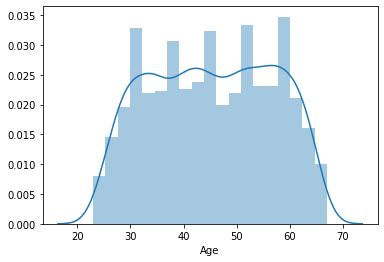

In [188]:
sns.distplot(df.Age)      #using library seaborn we plot a distplot using Age as variable

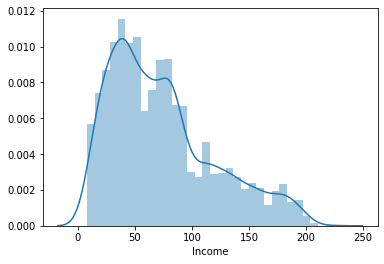

In [189]:
sns.distplot(df.Income)      #using library seaborn we plot a distplot using Income as variable
#the graph is right skewed

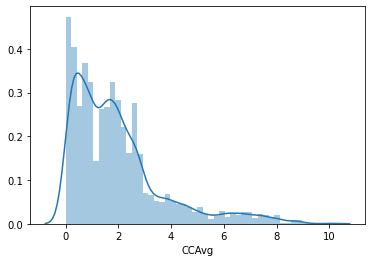

In [190]:
sns.distplot(df.CCAvg)      #using library seaborn we plot a distplot using CCAvg as variable
#the graph is right skewed

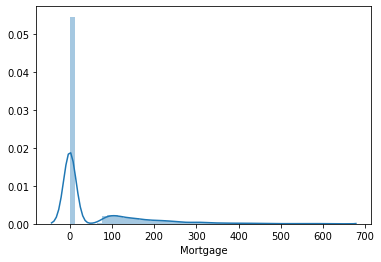

In [191]:
sns.distplot(df.Mortgage)      #using library seaborn we plot a distplot using Mortgage as variable
#right skewed graph due to discontinuous values

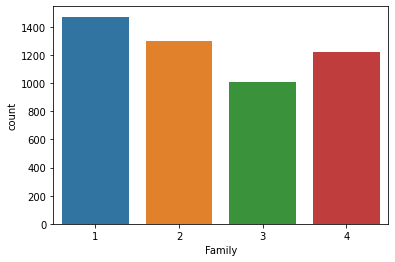

In [192]:
sns.countplot(df.Family)

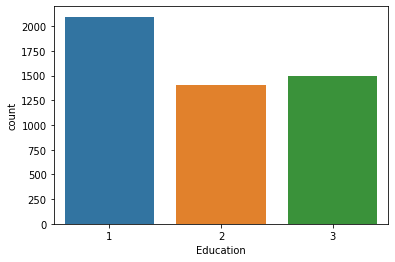

In [193]:
sns.countplot(df.Education)

Multivariate Analysis

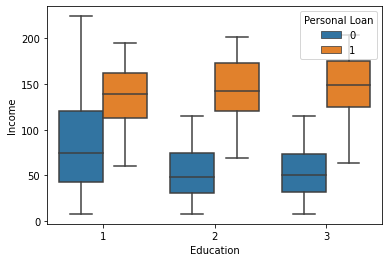

In [194]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df) 

This graph shows that people who have high income have more chance of getting Loan on Education

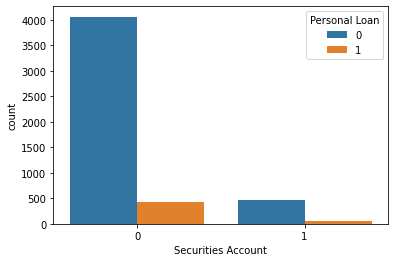

In [195]:
sns.countplot(x='Securities Account',data =df,hue='Personal Loan')

This graph shows that most people who have securities account dont have a personal loan

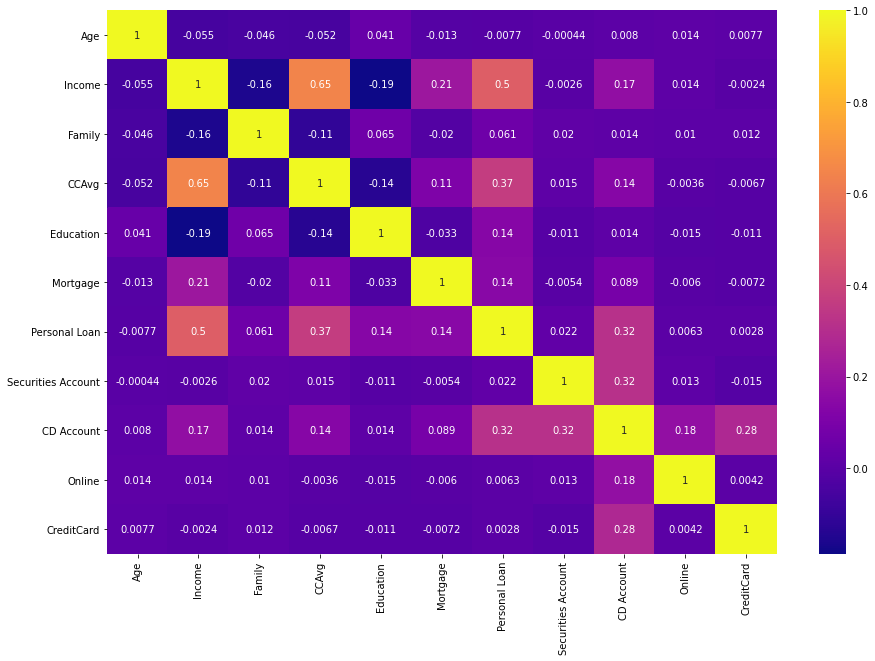

In [196]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True)

The above heatmap shows that most of the variables are independent and have low correlation value

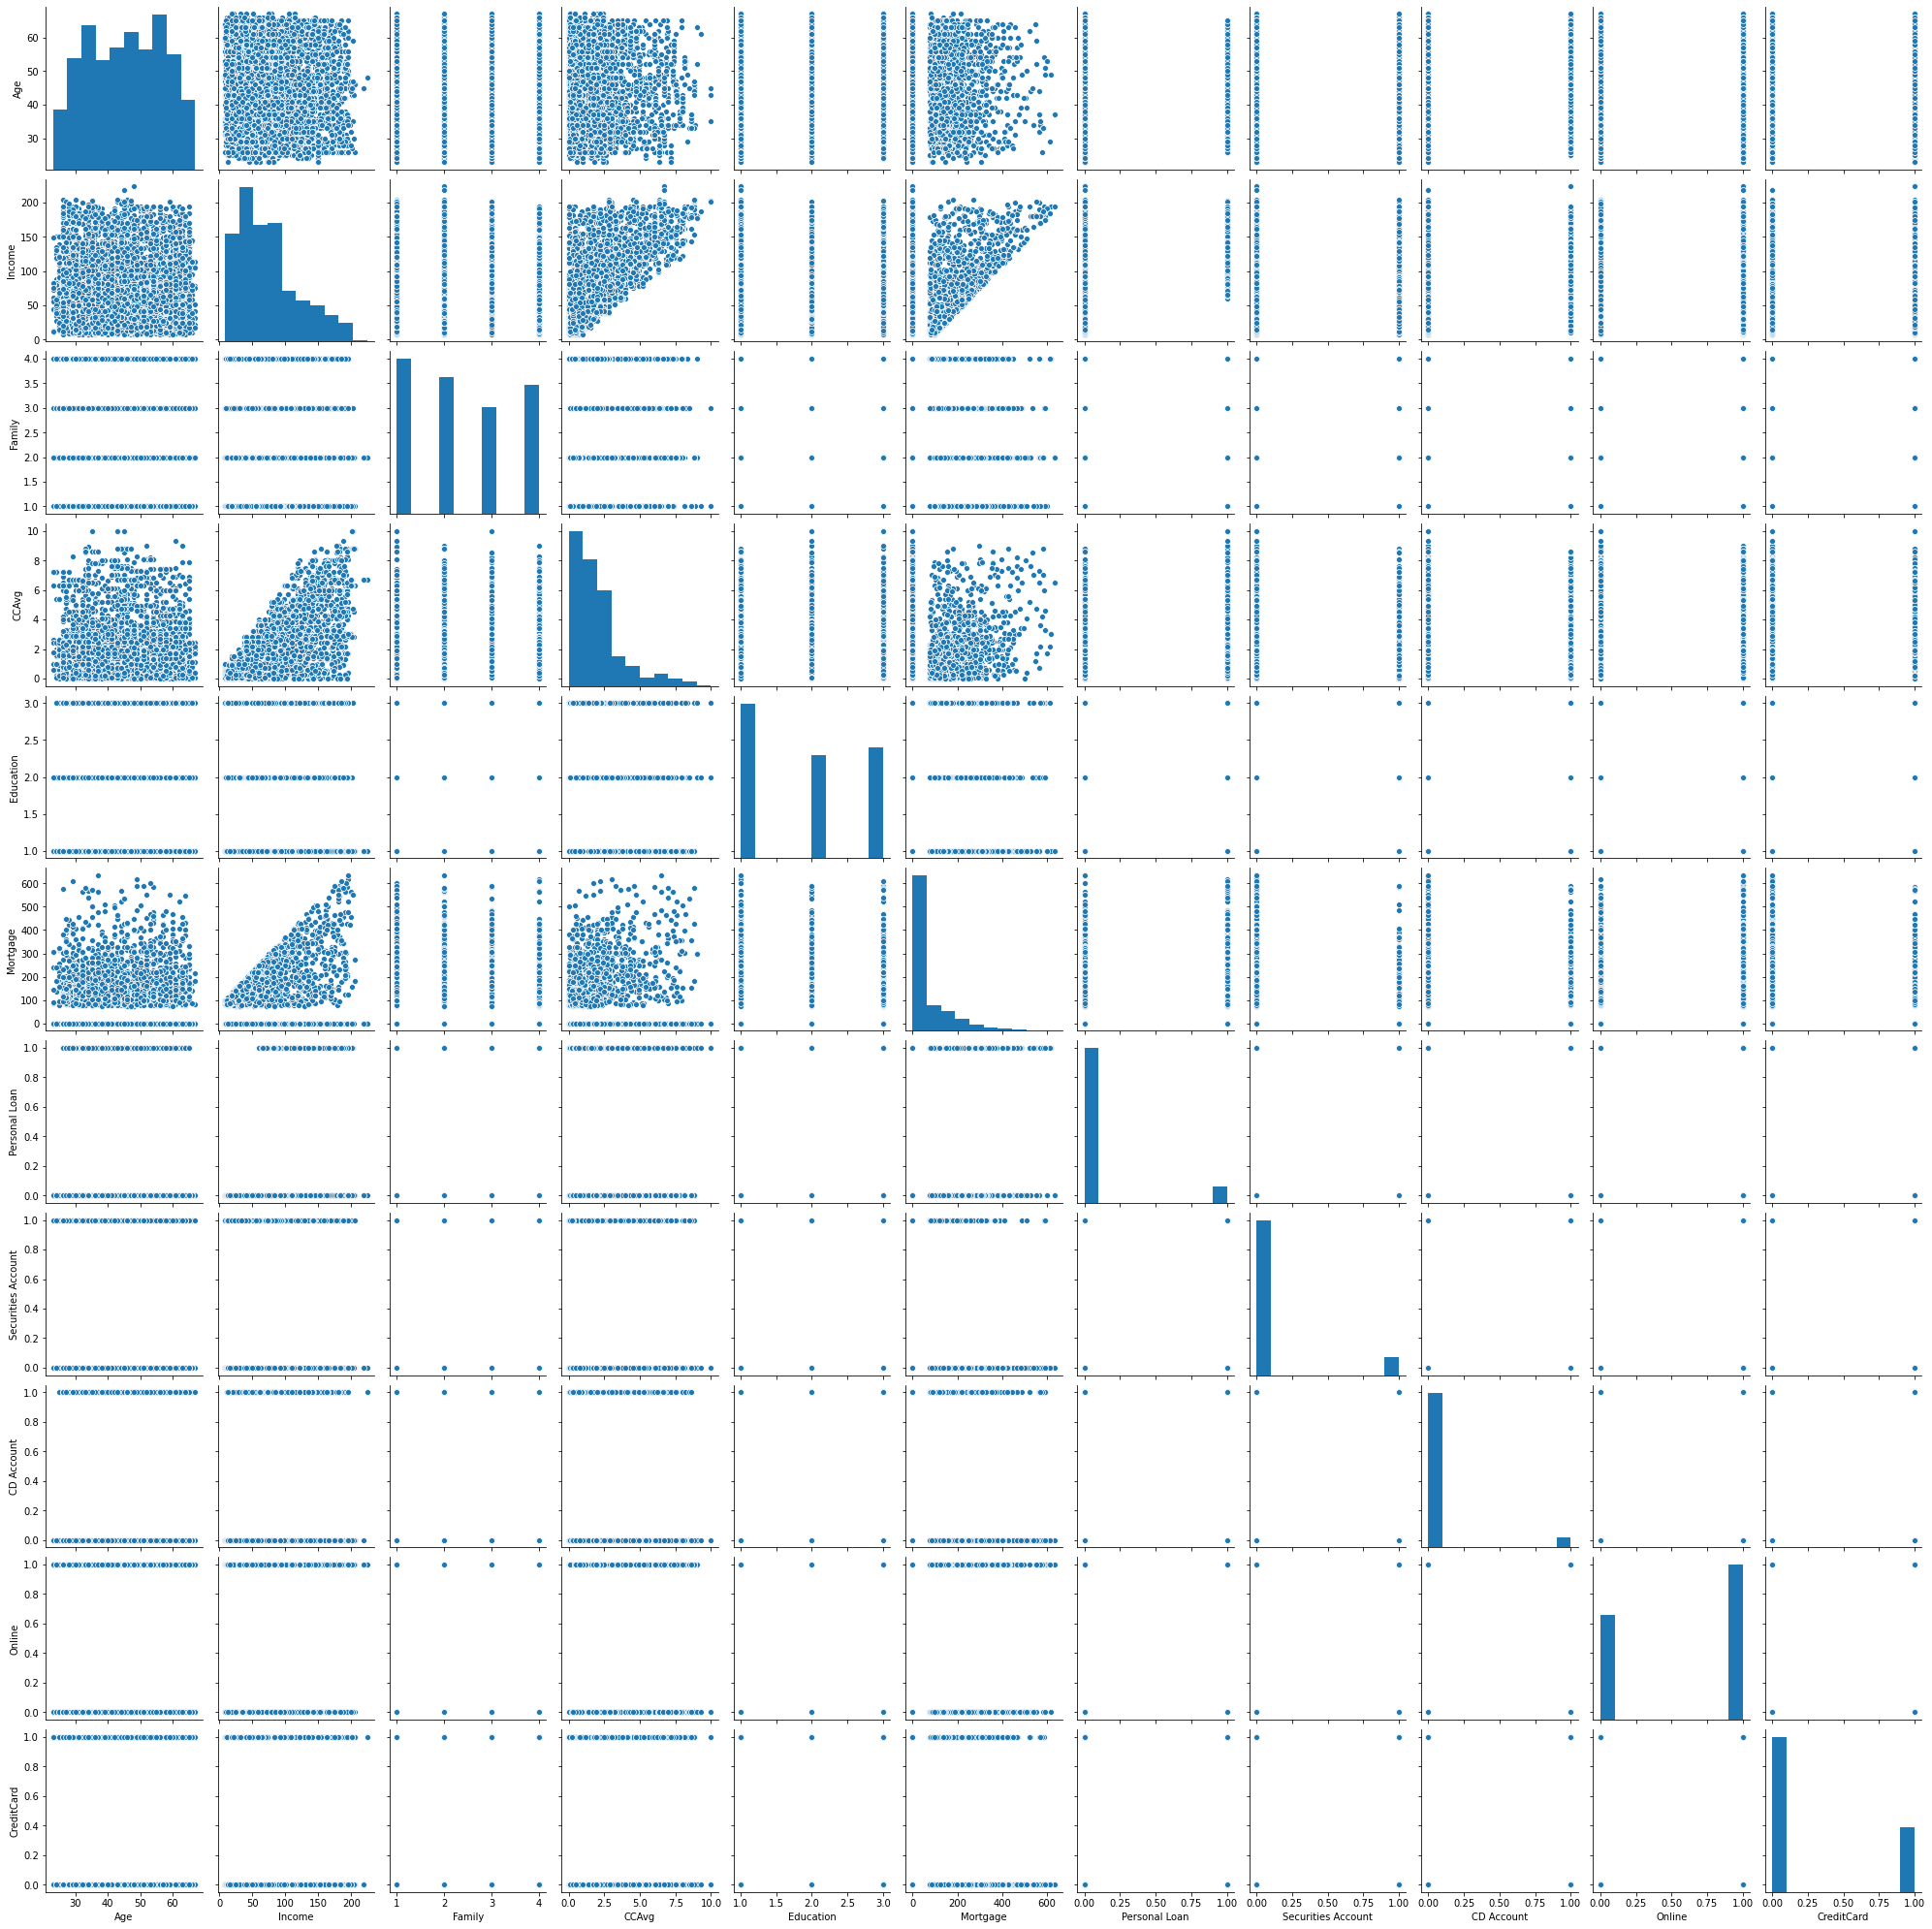

In [197]:
sns.pairplot(df)      #plotting of one variable with every other variable

The above graphs are formed by plotting one variable over the other variables

## **Step 4. Apply necessary transformations for the feature variables**

In [198]:
dX = df.loc[:,df.columns != "Personal Loan"]      #feature variables ,contains all except Personal Loan column
dY = df[["Personal Loan"]]                        #contains column Personal Loan only

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


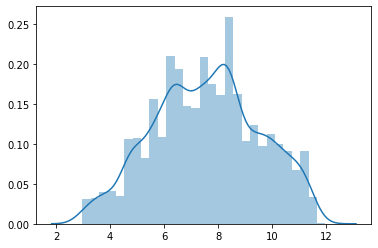

In [199]:
#Some varibale have a skewed distribution and needs to be normalised before splitting
#Applying power transform on Income
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(dX['Income'].values.reshape(-1,1))
temp = pt.transform(dX['Income'].values.reshape(-1,1))
sns.distplot(temp)
dX['Income'] =  pt.transform(dX['Income'].values.reshape(-1,1))

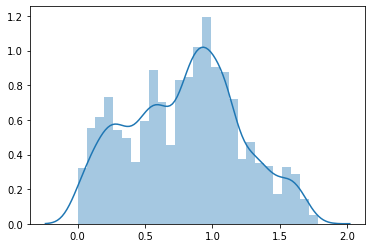

In [200]:
#Applying power transform on CCAvg
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(dX['CCAvg'].values.reshape(-1,1))
temp = pt.transform(dX['CCAvg'].values.reshape(-1,1))
sns.distplot(temp)

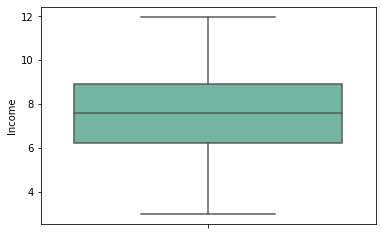

In [201]:
sns.boxplot(dX['Income'],orient="v",palette="Set2")   #looking at the boxplot we see no outliers after transformation

Since we cant use power transform on Mortgage we use bins

In [202]:
dX["Mortgage_Int"] = pd.cut(dX["Mortgage"],
                            bins=[0,100,200,300,400,500,600,700],   #label encoder
                            labels=[0,1,2,3,4,5,6],
                            include_lowest=True)
dX.drop("Mortgage",axis=1,inplace=True)

In [203]:
dX.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,1.6,1,1,0,0,0,0
1,45,5.876952,3,1.5,1,1,0,0,0,0
2,39,3.504287,1,1.0,1,0,0,0,0,0
3,35,8.983393,1,2.7,2,0,0,0,0,0
4,35,6.597314,4,1.0,2,0,0,0,1,0


Pie chart for Personal Loan variable

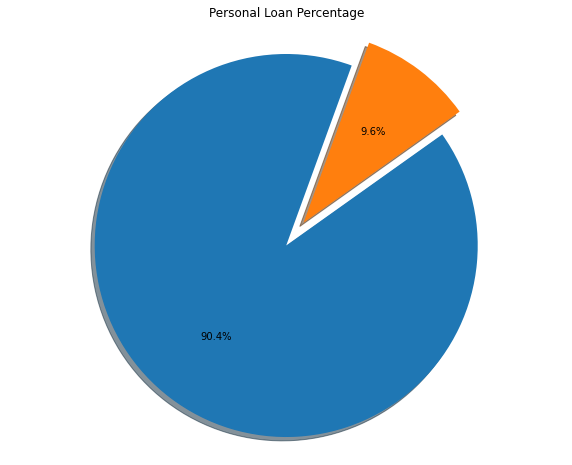

In [204]:
tempDF = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
tempDF.columns = ["Labels","Personal Loan"]
fig1,ax1 = plt.subplots(figsize=(10,8))
explode = (0,0.15)
ax1.pie(tempDF["Personal Loan"], explode=explode, autopct='%1.1f%%',
            shadow=True,startangle=70)
ax1.axis('equal')       #equal aspect ratio gives us pie in circle
plt.title("Personal Loan Percentage")
plt.show()

The pie chart gives us information that only 9.6% of people have probability of purchasing the loan

In [205]:
corr = df.corr()

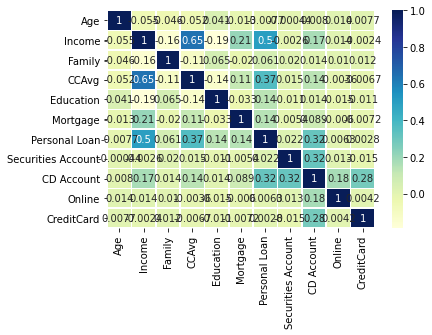

In [206]:
sns.heatmap(corr, linewidths=0.5,annot=True, cmap="YlGnBu")     #correlation of variables is low

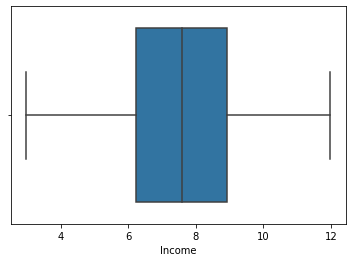

In [207]:
sns.boxplot(dX['Income'])       #no outliers
plt.show()
#boxplot after doing transformation

## **Step 5. Normalise data and split it into training and test set in the ratio of 70:30 respectively**

Split data using stratified sampling

In [208]:
#Splitting of dataset into train and test set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(dX,dY,test_size=0.3, stratify =dY, random_state=0)
#stratify makes sure that both test and train cases have simialr percentages of data

In [209]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)      #shape of train and test sets

(3500, 10) (1500, 10) (3500, 1) (1500, 1)


In [210]:
#Since the data is huge and belongs to different ranges it needs to scaled 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_xsc=sc.fit_transform(train_x)
test_xstd=sc.transform(test_x)

## **Step 6. Logistic Regression model**

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Logistic Regression with Standardization
model = LogisticRegression()
model.fit(train_xsc,train_y)
y_pred=model.predict(test_xstd)
ytr_pred=model.predict(train_xsc)
print("Model Test accuracy:",accuracy_score(test_y, y_pred))      #model shows an accuracy of 95.3% on test set
print("Model Train accuracy:",accuracy_score(train_y,ytr_pred))    #model shows an accuracy of 95.7% on test set

Model Test accuracy: 0.9533333333333334
Model Train accuracy: 0.9571428571428572


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The likelihood of a customer buying personal loans has an accuracy of 95.3% in train and 95.7% in test data

## **Step 7. Evaluating the Logistic Regression Model performance**

### Logistic Regression

In [212]:
#Logistic Regression Results
train_score = model.score(train_xsc, train_y)
print('Training Accuracy:', train_score.round(3))   # 95.7% Accuracy
test_score = model.score(test_xstd, test_y)
print('Testing Accuracy:', test_score.round(3))     # 95.3% Accuracy

Training Accuracy: 0.957
Testing Accuracy: 0.953


In [215]:
#Precision and recall values
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
pr = precision_score(test_y, y_pred).round(2)
print('Precision:', pr)
re = recall_score(test_y, y_pred).round(2)
print('Recall:', re)

Precision: 0.84
Recall: 0.64


In [213]:
#Area under curve value
lr_auc = roc_auc_score(test_y, y_pred)
print("ROC_AUC_Score:",lr_auc)

ROC_AUC_Score: 0.8128072763028515


In [214]:
#To print F1 score
print("F1 Score:",f1_score(test_y, y_pred, average='binary'))

F1 Score: 0.7244094488188975


Text(0, 0.5, 'Actual value')

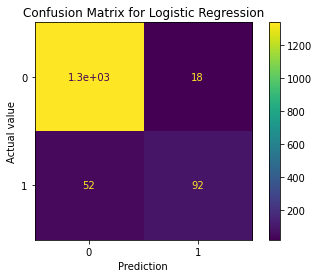

In [216]:
#Confusion matrix tells us to what extent prediction is correct
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, test_xstd, test_y)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel("Prediction")
plt.ylabel("Actual value")

Text(0.5, 1.0, 'ROC Curve for Logistic Regression')

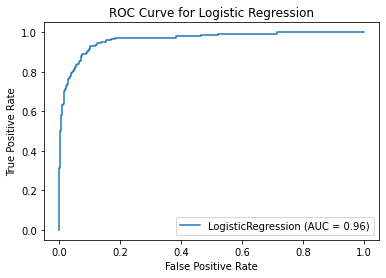

In [217]:
#ROC curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
plot_roc_curve(model, test_xstd, test_y)
plt.title('ROC Curve for Logistic Regression')

Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

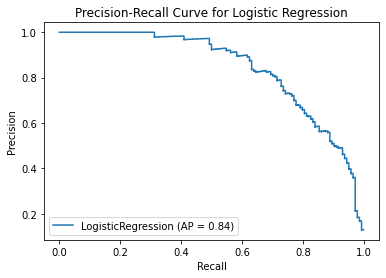

In [218]:
#Precision-Recall Curve for Logistic Regression
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, test_xstd, test_y)
plt.title('Precision-Recall Curve for Logistic Regression')

In [219]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_y,y_pred))            #Mean absolute error
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y,y_pred)))  #Root mean squared error
print('R2 Score', metrics.r2_score(test_y,y_pred))                                    #R2 Score

Mean Absolute Error:  0.04666666666666667
Root Mean Squared Error 0.21602468994692867
R2 Score 0.4622664700098328


##**Step 8.Build other classification algorithms and compare their performance**

### KNN Classifier (k=5)

In [220]:
#knn Classification for 5 neighbors for whole data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(dX, dY)
y_predk = knn.predict(dX)
print(metrics.accuracy_score(dY, y_predk))

0.9652


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [221]:
#knn Classification for 5 neighbors for train and test set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_xsc, train_y)
y_predknn = knn.predict(test_xstd)
print(metrics.accuracy_score(test_y, y_predknn))

0.9626666666666667


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [222]:
#KNN Classification Results
train_score = knn.score(train_xsc, train_y)
print('Training Accuracy:', train_score.round(3))   # 96.6% Accuracy
test_score = knn.score(test_xstd, test_y)
print('Testing Accuracy:', test_score.round(3))     # 96.3% Accuracy

Training Accuracy: 0.966
Testing Accuracy: 0.963


In [223]:
#Precision and recall values
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
prknn = precision_score(test_y, y_predknn).round(2)
print('Precision:', prknn)
reknn = recall_score(test_y, y_predknn).round(2)
print('Recall:', reknn)

Precision: 0.94
Recall: 0.65


In [224]:
lr_auc = roc_auc_score(test_y, y_predknn)
print("ROC_AUC_Score:",lr_auc)

ROC_AUC_Score: 0.8241764995083579


In [225]:
#To print F1 score
print("F1 Score:",f1_score(test_y, y_predknn, average='binary'))

F1 Score: 0.7704918032786886


Text(0, 0.5, 'Actual value')

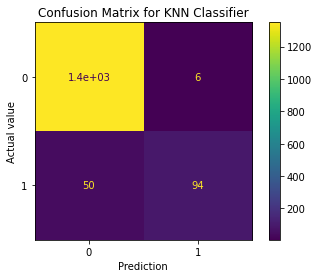

In [226]:
#Confusion matrix tells us to what extent prediction is correct
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, test_xstd, test_y)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel("Prediction")
plt.ylabel("Actual value")

Text(0.5, 1.0, 'ROC Curve for KNN Classifier')

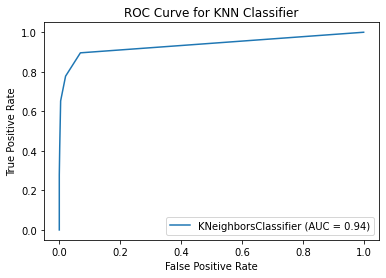

In [227]:
#ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn, test_xstd, test_y)
plt.title('ROC Curve for KNN Classifier')

Text(0.5, 1.0, 'Precision-Recall Curve for KNN Classifier')

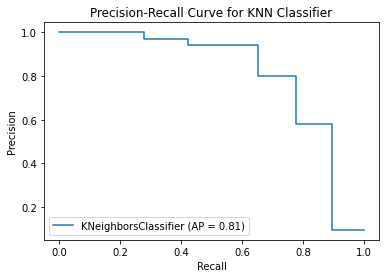

In [228]:
#Precision-Recall Curve for KNN Classifier
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(knn, test_xstd, test_y)
plt.title('Precision-Recall Curve for KNN Classifier')

In [229]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_y,y_predknn))            #Mean absolute error
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y,y_predknn)))  #Root mean squared error
print('R2 Score', metrics.r2_score(test_y,y_predknn))                                    #R2 Score

Mean Absolute Error:  0.037333333333333336
Root Mean Squared Error 0.19321835661585918
R2 Score 0.5698131760078662


### KNN Classifier (k=3)

In [230]:
#knn Classification for 3 neighbors for whole data
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(dX, dY)
y_predk1 = knn1.predict(dX)
print(metrics.accuracy_score(dY, y_predk1))

0.9734


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [231]:
#knn Classification for 3 neighbors for train and test set
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(train_xsc, train_y)
y_predknn1 = knn1.predict(test_xstd)
print(metrics.accuracy_score(test_y, y_predknn1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9633333333333334


In [232]:
#KNN Classification Results
train_score = knn1.score(train_xsc, train_y)
print('Training Accuracy:', train_score.round(3))   # 97.7% Accuracy
test_score = knn1.score(test_xstd, test_y)
print('Testing Accuracy:', test_score.round(3))     # 96.3% Accuracy

Training Accuracy: 0.977
Testing Accuracy: 0.963


In [233]:
#Precision and recall values
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
prknn1 = precision_score(test_y, y_predknn1).round(2)
print('Precision:', prknn1)
reknn1 = recall_score(test_y, y_predknn1).round(2)
print('Recall:', reknn1)

Precision: 0.92
Recall: 0.68


In [234]:
lr_auc = roc_auc_score(test_y, y_predknn1)
print("ROC_AUC_Score:",lr_auc)

ROC_AUC_Score: 0.8369591937069814


In [235]:
#To print F1 score
print("F1 Score:",f1_score(test_y, y_predknn1, average='binary'))

F1 Score: 0.7808764940239044


Text(0, 0.5, 'Actual value')

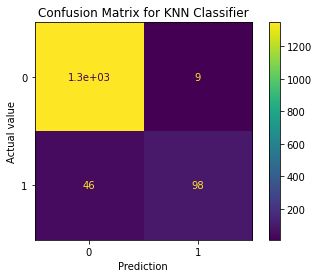

In [236]:
#Confusion matrix tells us to what extent prediction is correct
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn1, test_xstd, test_y)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel("Prediction")
plt.ylabel("Actual value")

Text(0.5, 1.0, 'ROC Curve for KNN Classifier')

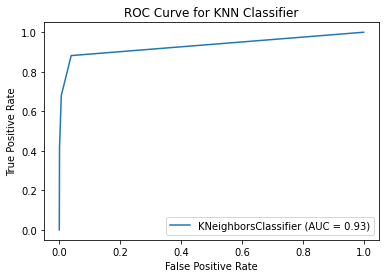

In [237]:
#ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn1, test_xstd, test_y)
plt.title('ROC Curve for KNN Classifier')

Text(0.5, 1.0, 'Precision-Recall Curve for KNN Classifier')

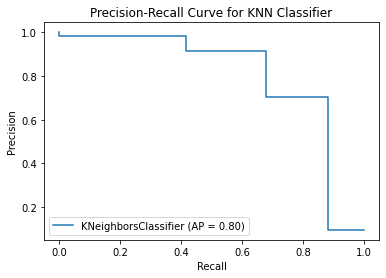

In [238]:
#Precision-Recall Curve for KNN Classifier
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(knn1, test_xstd, test_y)
plt.title('Precision-Recall Curve for KNN Classifier')

In [239]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_y,y_predknn1))            #Mean absolute error
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y,y_predknn1)))  #Root mean squared error
print('R2 Score', metrics.r2_score(test_y,y_predknn1))                                    #R2 Score

Mean Absolute Error:  0.03666666666666667
Root Mean Squared Error 0.19148542155126763
R2 Score 0.5774950835791544


### Random Forest 

In [240]:
#Random Forest Classifier results
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=8,n_jobs=-1)
rf.fit(train_xsc, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [241]:
#Accuracy of train and test set
train_score = rf.score(train_xsc, train_y)
print('Training Accuracy:', train_score.round(3))   # 99.5% Accuracy
test_score = rf.score(test_xstd, test_y)
print('Testing Accuracy:', test_score.round(3))     # 98.6% Accuracy

Training Accuracy: 0.995
Testing Accuracy: 0.987


In [242]:
#Precision and recall values
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
y_pred_rf = rf.predict(test_xstd)
pr_rf = precision_score(test_y, y_pred_rf).round(2)
print('Precision:', pr_rf)
re_rf = recall_score(test_y, y_pred_rf).round(2)
print('Recall:', re_rf)

Precision: 0.98
Recall: 0.88


In [243]:
lr_auc = roc_auc_score(test_y, y_pred_rf)
print("ROC_AUC_Score:",lr_auc)

ROC_AUC_Score: 0.9402347590953786


In [244]:
#To print F1 score
print("F1 Score:",f1_score(test_y, y_pred_rf, average='binary'))

F1 Score: 0.9304029304029303


Text(0, 0.5, 'Actual value')

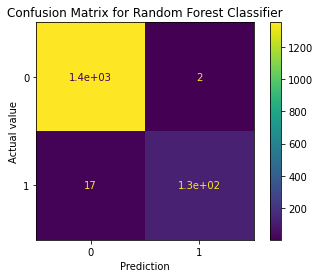

In [245]:
#Confusion matrix for ranfom forest classifier
plot_confusion_matrix(rf, test_xstd, test_y)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel("Prediction")
plt.ylabel("Actual value")

Text(0.5, 1.0, 'ROC Curve for Random Forest Classifier')

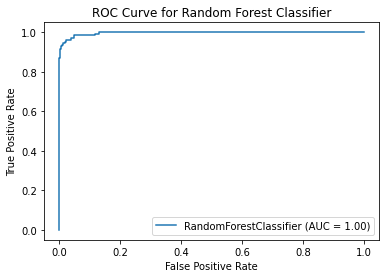

In [246]:
#ROC Curve for Random Forest Classifier
plot_roc_curve(rf, test_xstd, test_y)
plt.title('ROC Curve for Random Forest Classifier')

Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

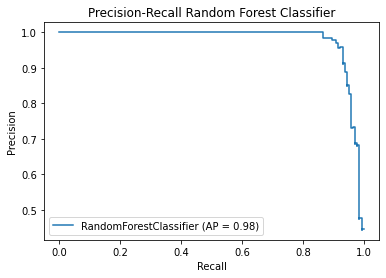

In [247]:
#Precision-Recall Random Forest Classifier
plot_precision_recall_curve(rf, test_xstd, test_y)
plt.title('Precision-Recall Random Forest Classifier')

In [248]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_y,y_pred_rf))            #Mean absolute error
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y,y_pred_rf)))  #Root mean squared error
print('R2 Score', metrics.r2_score(test_y,y_pred_rf))                                    #R2 Score

Mean Absolute Error:  0.012666666666666666
Root Mean Squared Error 0.11254628677422755
R2 Score 0.8540437561455261


### Decision Tree

In [249]:
#Decision Tree Classifier results
from sklearn.tree import DecisionTreeClassifier   #importing decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5, random_state=0)
dtc.fit(train_xsc, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [250]:
#Accuracy of train and test set
train_score_dt = dtc.score(train_xsc, train_y)
print('Training Accuracy:', train_score_dt.round(3))
test_score_dt = dtc.score(test_xstd, test_y)
print('Testing Accuracy:', test_score_dt.round(3))

Training Accuracy: 0.991
Testing Accuracy: 0.981


In [251]:
#Precision and Recall values
y_pred_dt = dtc.predict(test_xstd)
pr_dt = precision_score(test_y, y_pred_dt).round(3)
print('Precision:', pr_dt)
re_dt = recall_score(test_y, y_pred_dt).round(3)
print('Recall:', re_dt)

Precision: 0.926
Recall: 0.868


In [252]:
lr_auc = roc_auc_score(test_y, y_pred_dt)
print("ROC_AUC_Score:",lr_auc)

ROC_AUC_Score: 0.9303404621435595


In [253]:
#To print F1 score
print("F1 Score:",f1_score(test_y, y_pred_dt, average='binary'))

F1 Score: 0.8960573476702509


Text(0, 0.5, 'Actual value')

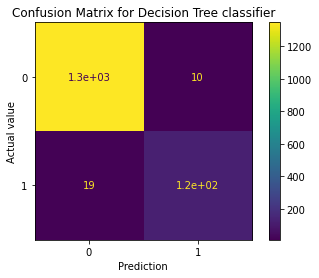

In [254]:
#Confusion matrix for Decision Tree classifier
plot_confusion_matrix(dtc, test_xstd, test_y)
plt.title('Confusion Matrix for Decision Tree classifier')
plt.xlabel("Prediction")
plt.ylabel("Actual value")

Text(0.5, 1.0, 'ROC Curve for Decision Tree classifier')

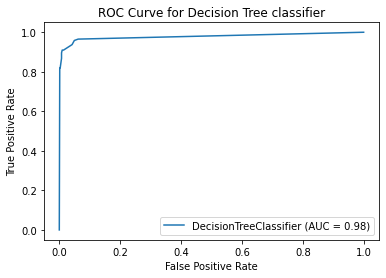

In [255]:
#ROC Curve for Decision Tree classifier
plot_roc_curve(dtc, test_xstd, test_y)
plt.title('ROC Curve for Decision Tree classifier')

Text(0.5, 1.0, 'Precision-Recall Decision Tree classifier')

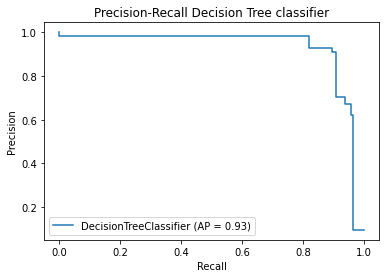

In [256]:
#Precision-Recall Decision Tree classifier
plot_precision_recall_curve(dtc, test_xstd, test_y)
plt.title('Precision-Recall Decision Tree classifier')

In [257]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(test_y,y_pred_dt))            #Mean absolute error
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(test_y,y_pred_dt)))  #Root mean squared error
print('R2 Score', metrics.r2_score(test_y,y_pred_dt))                                    #R2 Score

Mean Absolute Error:  0.019333333333333334
Root Mean Squared Error 0.1390443574307614
R2 Score 0.777224680432645


[Text(197.9826923076923, 199.32, 'X[1] <= 0.962\ngini = 0.174\nsamples = 3500\nvalue = [3164, 336]'),
 Text(112.67307692307693, 163.07999999999998, 'X[3] <= 0.573\ngini = 0.044\nsamples = 2851\nvalue = [2787, 64]'),
 Text(38.63076923076923, 126.83999999999999, 'X[1] <= 0.869\ngini = 0.007\nsamples = 2620\nvalue = [2611, 9]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 2544\nvalue = [2544, 0]'),
 Text(51.50769230769231, 90.6, 'X[2] <= 0.966\ngini = 0.209\nsamples = 76\nvalue = [67, 9]'),
 Text(25.753846153846155, 54.359999999999985, 'X[4] <= 0.745\ngini = 0.126\nsamples = 59\nvalue = [55, 4]'),
 Text(12.876923076923077, 18.119999999999976, 'gini = 0.043\nsamples = 45\nvalue = [44, 1]'),
 Text(38.63076923076923, 18.119999999999976, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(77.26153846153846, 54.359999999999985, 'X[4] <= -0.441\ngini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(64.38461538461539, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 T

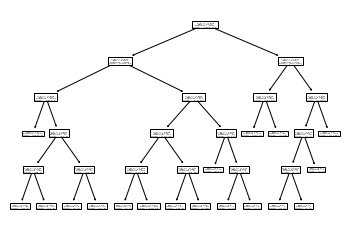

In [258]:
#Plotting a Decision tree
from sklearn import tree
tree.plot_tree(dtc)

## **Step 9. Give a business understanding of your model**

**Logistic Regression**

* Training Accuracy: 0.957
* Testing Accuracy: 0.953
* Precision: 0.84
* Recall: 0.64
* AUC: 0.96
* F1 Score: 0.7244094488188975
* ROC_AUC_Score: 0.8128072763028515
* Mean Absolute Error:  0.04666666666666667
* Root Mean Squared Error 0.21602468994692867
* R2 Score 0.4622664700098328
* False Negative: 52
* False Positive: 18

**KNN Classifier(k=5)**
* Training Accuracy: 0.966
* Testing Accuracy: 0.963
* Precision: 0.97
* Recall: 0.66
* AUC: 0.94
* F1 Score: 0.7704918032786886
* ROC_AUC_Score: 0.8241764995083579
* Mean Absolute Error:  0.037333333333333336
* Root Mean Squared Error 0.19321835661585918
* R2 Score 0.5698131760078662
* False Negative: 50
* False Positive: 6

**KNN Classifier (k=3)**
* Training Accuracy: 0.977
* Testing Accuracy: 0.963
* Precision: 0.96
* Recall: 0.67
* AUC: 0.93
* F1 Score: 0.7808764940239044
* ROC_AUC_Score: 0.8369591937069814
* Mean Absolute Error:  0.03666666666666667
* Root Mean Squared Error 0.19148542155126763
* R2 Score 0.5774950835791544
* False Negative: 46
* False Positive: 9

**Random Forest Classifier**
* Training Accuracy: 0.995
* Testing Accuracy: 0.986
* Precision: 0.98
* Recall: 0.87
* AUC: 0.98
* F1 Score: 0.922509225092251
* ROC_AUC_Score: 0.9332903146509343
* Mean Absolute Error:  0.014
* Root Mean Squared Error 0.11832159566199232
* R2 Score 0.8386799410029498
* False Negative: 19
* False Positive: 2

**Decision Tree Classifier**
* Training Accuracy: 0.991
* Testing Accuracy: 0.981
* Precision: 0.926
* Recall: 0.868
* AUC:0.98
* F1 Score: 0.8960573476702509
* ROC_AUC_Score: 0.9303404621435595
* Mean Absolute Error:  0.019333333333333334
* Root Mean Squared Error 0.1390443574307614
* R2 Score 0.777224680432645
* False Negative: 19
* False Positive: 10

**CONCLUSION**

* During the above analysis, different classifiers and regression 
models were applied on the data set.
* We were able to observe that the model which has lower number of false positives and false negatives in its confusion matrix is a better model and gives better prediction.
* Since accuracy alone cannot determine a models performance, various metrices like ROC_AUC_Score, F1_Score, Precision and Recall were also taken into account.


---


Therefore **Random Forest Classifier** would be able to give a better prediction of who would avail personal loan since it has low false positives and better accuracy and high value in other metrics compared to other models.